# 1. Principal component analysis

In [11]:
df

,Company Name,Stock Price,Market Capitalization,Earnings per Share (EPS),Price-to-Earnings Ratio (P/E Ratio),Dividend Yield,Beta,Debt-to-Equity Ratio
0,Company 1,106.181018,9.643978e+07,2.082792,6.834102,0.015153,1.183491,0.559893
1,Company 2,192.607146,6.242355e+08,6.206158,21.578656,0.031911,1.408549,0.300919
2,Company 3,159.799091,4.523159e+08,7.454527,19.884159,0.017500,1.537796,0.167134
3,Company 4,139.798773,5.870219e+08,7.405382,15.378641,0.046419,1.074604,0.407174
4,Company 5,73.402796,1.688462e+08,5.262345,15.554806,0.003281,1.803649,0.232273
...,...,...,...,...,...,...,...,...
1562,Company 1563,167.078827,8.386533e+08,5.104656,29.369002,0.010023,1.190849,0.891455
1563,Company 1564,91.220905,8.052852e+08,5.126803,26.063456,0.020673,1.232502,0.165878
1564,Company 1565,173.392148,8.231608e+08,1.469879,17.521915,0.010310,0.533855,0.149509
1565,Company 1566,113.560738,9.327778e+08,9.829121,29.535536,0.043828,1.530391,0.576910


In [12]:
scaled_data

array([[-0.4254475 , -1.39301281, -1.03128913, ..., -0.65532861,
        -0.12677409,  0.21863054],
       [ 1.53974414,  0.43032827,  0.43130679, ...,  0.51554109,
         0.40540523, -0.68685266],
       [ 0.79374156, -0.16359092,  0.87411483, ..., -0.49134087,
         0.7110273 , -1.15462099],
       ...,
       [ 1.10282588,  1.11754262, -1.2486951 , ..., -0.9937176 ,
        -1.66292822, -1.21624784],
       [-0.25764449,  1.49622919,  1.7164055 , ...,  1.34816315,
         0.6935178 ,  0.27812721],
       [ 0.57393842,  0.15559588, -0.85679359, ..., -1.16111274,
        -0.7001655 ,  0.55988553]])

In [16]:
cov_matrix.shape

(7, 7)

In [19]:
eigenvectors.shape

(7, 7)

In [20]:
eigenvalues

array([1.09621816, 1.04631135, 1.01990277, 0.93508462, 0.96984232,
       0.94510111, 0.99200966])

In [21]:
sorted_eigenvectors

array([[-1.60502285e-01, -5.12874497e-01, -4.14541278e-01,
         5.89905196e-02, -7.06188190e-01, -6.20265038e-02,
        -1.82552367e-01],
       [ 3.65246764e-01, -1.92029358e-01, -5.87214779e-01,
        -9.88707910e-02,  4.83846533e-01, -4.48604791e-01,
        -1.99422092e-01],
       [-4.61666991e-01,  4.60489156e-01, -3.15586644e-04,
         1.78336914e-01, -1.31905901e-01, -7.21185351e-01,
        -7.41734054e-02],
       [ 1.56308607e-01,  4.96951264e-01, -4.50834709e-01,
        -4.92427908e-01, -2.93542941e-01,  1.05051752e-01,
         4.30890418e-01],
       [ 5.26744032e-01,  2.91674878e-01,  2.64802792e-01,
        -1.71933270e-01, -3.26649930e-01, -6.66644040e-02,
        -6.53177313e-01],
       [-1.69476268e-01, -3.57521566e-01,  3.76248303e-01,
        -7.68820730e-01,  2.03719072e-02, -3.22159755e-01,
         8.12779261e-02],
       [ 5.45053709e-01, -1.67862294e-01,  2.61532012e-01,
         3.03000034e-01, -2.37716124e-01, -3.94374470e-01,
         5.4999137

In [22]:
selected_eigenvectors

array([[-0.16050228, -0.5128745 ],
       [ 0.36524676, -0.19202936],
       [-0.46166699,  0.46048916],
       [ 0.15630861,  0.49695126],
       [ 0.52674403,  0.29167488],
       [-0.16947627, -0.35752157],
       [ 0.54505371, -0.16786229]])

In [24]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 0: load the data
df = pd.read_csv("./stock_data.csv")


# Step 1: Standardize the original data to have zero mean and unit variance
features = ['Stock Price', 'Market Capitalization', 'Earnings per Share (EPS)',
            'Price-to-Earnings Ratio (P/E Ratio)', 'Dividend Yield', 'Beta', 'Debt-to-Equity Ratio']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

# Step 2: Calculate the covariance matrix of the standardized data
cov_matrix = np.cov(scaled_data, rowvar=False)

# Step 3: Compute the eigenvectors and eigenvalues of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort the eigenvectors based on their corresponding eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Step 5: Choose the top k eigenvectors (principal components) that capture the desired amount of variance
k = 2  # Number of principal components to choose
selected_eigenvectors = sorted_eigenvectors[:, :k]

# Step 6: Project the original data onto the selected principal components
reduced_data = np.dot(scaled_data, selected_eigenvectors)

# Create a new DataFrame for the reduced-dimensional representation
df_reduced = pd.DataFrame(data=reduced_data, columns=['Principal Component 1', 'Principal Component 2'])

# Concatenate the company names with the reduced DataFrame
df_reduced['Company Name'] = df['Company Name']

# Display the first few records of the reduced DataFrame
print(df_reduced.head())

print(df_reduced)

   Principal Component 1  Principal Component 2 Company Name
0              -0.394737              -0.889605    Company 1
1              -0.369344              -0.262875    Company 2
2              -1.544527              -0.002583    Company 3
3               0.316969               0.665285    Company 4
4              -1.826718              -0.013787    Company 5
      Principal Component 1  Principal Component 2  Company Name
0                 -0.394737              -0.889605     Company 1
1                 -0.369344              -0.262875     Company 2
2                 -1.544527              -0.002583     Company 3
3                  0.316969               0.665285     Company 4
4                 -1.826718              -0.013787     Company 5
...                     ...                    ...           ...
1562               0.749377              -0.363348  Company 1563
1563              -0.098088               0.928748  Company 1564
1564              -0.092855              -0.83359

### using library

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: load the data
df = pd.read_csv("./stock_data.csv")

# Step 2: Standardize the financial data
scaler = StandardScaler()
financial_data = df.drop('Company Name', axis=1)  # Drop company names for PCA
scaled_data = scaler.fit_transform(financial_data)

# Step 3: Apply PCA
pca = PCA()
principal_components = pca.fit_transform(scaled_data)

# Step 4: Calculate explained variance
explained_variance = pca.explained_variance_ratio_

# Step 5: Select components (e.g., retain top 4 components)
n_components = 4
selected_components = principal_components[:, :n_components]

# Step 6: Use selected components for portfolio optimization and risk management
# Use selected_components for portfolio optimization and risk management analyses
# ...

# Optional: Print the explained variance of each component
print("Explained Variance of Principal Components:")
for i, variance in enumerate(explained_variance):
    print(f"Component {i + 1}: {variance:.4f}")

# Optional: Create a new DataFrame for the reduced-dimensional representation
df_reduced = pd.DataFrame(data=selected_components, columns=[f'Principal Component {i + 1}' for i in range(n_components)])

# Concatenate the company names with the reduced DataFrame
df_reduced['Company Name'] = df['Company Name']

# Display the first few records of the reduced DataFrame
print(df_reduced.head())


Explained Variance of Principal Components:
Component 1: 0.1565
Component 2: 0.1494
Component 3: 0.1456
Component 4: 0.1416
Component 5: 0.1385
Component 6: 0.1349
Component 7: 0.1335
   Principal Component 1  Principal Component 2  Principal Component 3  \
0               0.394737              -0.889605               1.481907   
1               0.369344              -0.262875              -1.044898   
2               1.544527              -0.002583              -0.555909   
3              -0.316969               0.665285              -0.018774   
4               1.826718              -0.013787               1.135283   

   Principal Component 4 Company Name  
0               0.916454    Company 1  
1              -0.770715    Company 2  
2              -0.765828    Company 3  
3               0.212423    Company 4  
4              -0.873778    Company 5  


In [28]:
selected_components.shape

(1567, 4)

# 2. multidimensional scaling

In [39]:
df

,Brand,Design,Performance,Camera,Battery,Price
0,LG,9.2,8.6,8.7,7.5,8.3
1,OnePlus,8.3,8.3,7.3,8.6,8.4
2,Xiaomi,8.3,8.1,7.7,7.6,8.5
3,LG,7.3,7.3,8.0,7.8,7.4
4,Google,8.1,9.2,9.3,8.4,7.9
...,...,...,...,...,...,...
1095,Sony,8.3,8.8,8.5,7.6,8.3
1096,Google,9.5,7.2,8.6,7.1,7.8
1097,Google,9.0,8.1,8.7,8.8,7.4
1098,LG,8.5,7.1,7.3,7.3,7.7


In [42]:
dissimilarity_matrix

array([[0.        , 2.01990099, 1.4525839 , ..., 1.67032931, 2.25831796,
        1.65227116],
       [2.01990099, 0.        , 1.1       , ..., 1.87882942, 1.91311265,
        2.26936114],
       [1.4525839 , 1.1       , 0.        , ..., 2.03469899, 1.3892444 ,
        1.79443584],
       ...,
       [1.67032931, 1.87882942, 2.03469899, ..., 0.        , 2.3558438 ,
        1.74928557],
       [2.25831796, 1.91311265, 1.3892444 , ..., 2.3558438 , 0.        ,
        2.44744765],
       [1.65227116, 2.26936114, 1.79443584, ..., 1.74928557, 2.44744765,
        0.        ]])

In [44]:
reduced_data.shape

(1100, 2)

C:\Users\Surya Charan Teja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Reduced Data Set:
      Dimension 1  Dimension 2    Brand
0       -0.376028     0.858462       LG
1       -0.448803     0.137700  OnePlus
2       -0.439467    -0.285132   Xiaomi
3        1.123806    -1.285005       LG
4        0.708514     0.467581   Google
...           ...          ...      ...
1095    -0.303438    -0.129014     Sony
1096     1.537153     1.461362   Google
1097     0.909022     1.011296   Google
1098     0.886414    -1.558926       LG
1099     0.703184    -0.602908   Google

[1100 rows x 3 columns]


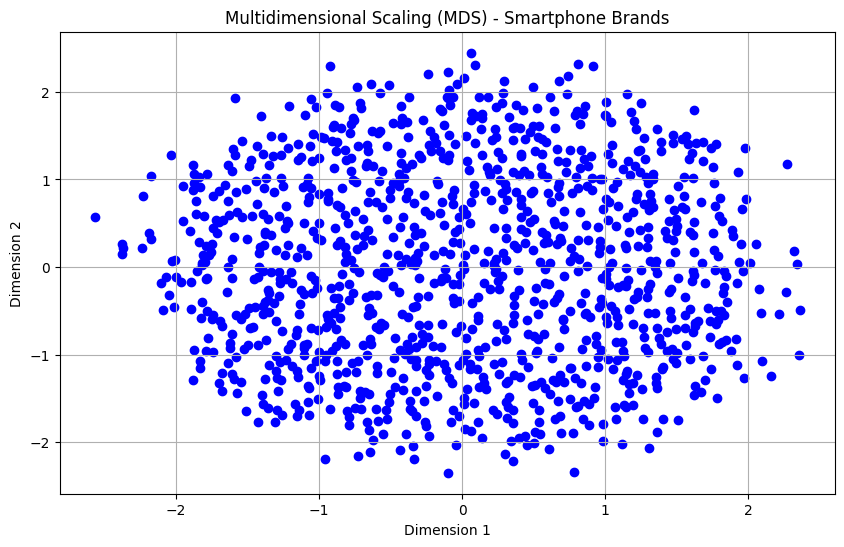

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from scipy.spatial.distance import pdist, squareform

# load the data set
df = pd.read_csv("./Market_research.csv")

# Step 1: Compute pairwise Euclidean distances (dissimilarity)
dissimilarity_matrix = squareform(pdist(df.iloc[:, 1:], metric='euclidean'))

# Step 2: Apply MDS with 2 dimensions
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
reduced_data = mds.fit_transform(dissimilarity_matrix)

# Create a new DataFrame for the reduced data
reduced_df = pd.DataFrame(reduced_data, columns=['Dimension 1', 'Dimension 2'])
reduced_df['Brand'] = df['Brand']

# Step 3: Display reduced data set
print("Reduced Data Set:")
print(reduced_df)

# Step 4: Visualization - Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c='b', marker='o')

# Add labels for each point

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Multidimensional Scaling (MDS) - Smartphone Brands')
plt.grid(True)
plt.show()


In [50]:
import pandas as pd
import numpy as np

# Sample text data for each category
sports_text = ["Exciting match! The home team won the game.", "Athlete breaks the world record.", ...]
technology_text = ["New smartphone released with advanced features.", "AI technology revolutionizing industries.", ...]
politics_text = ["Election results are out. New government formed.", "Debate on the new tax policy.", ...]

# Create the data set
data = []
for i in range(2000):
    if i % 3 == 0:
        data.append([np.random.choice(sports_text), "Sports"])
    elif i % 3 == 1:
        data.append([np.random.choice(technology_text), "Technology"])
    else:
        data.append([np.random.choice(politics_text), "Politics"])

# Convert data to a DataFrame
df = pd.DataFrame(data, columns=["Text", "Category"])

# Shuffle the data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the first few rows of the DataFrame
print(df.head())
df.to_csv("Sportdata.csv", index=True)

                                               Text    Category
0       Exciting match! The home team won the game.      Sports
1                                          Ellipsis    Politics
2                                          Ellipsis  Technology
3                                          Ellipsis    Politics
4  Election results are out. New government formed.    Politics


# 3. Linear Discriminant analysis

In [58]:
df

,Text,Category
0,Exciting match! The home team won the game.,Sports
1,Ellipsis,Politics
2,Ellipsis,Technology
3,Ellipsis,Politics
4,Election results are out. New government formed.,Politics
...,...,...
1995,Ellipsis,Politics
1996,New smartphone released with advanced features.,Technology
1997,Ellipsis,Politics
1998,Ellipsis,Technology


In [60]:
print(X)

  (0, 8)	1
  (0, 15)	1
  (0, 28)	2
  (0, 13)	1
  (0, 26)	1
  (0, 30)	1
  (0, 11)	1
  (1, 7)	1
  (2, 7)	1
  (3, 7)	1
  (4, 6)	1
  (4, 22)	1
  (4, 2)	1
  (4, 18)	1
  (4, 16)	1
  (4, 12)	1
  (4, 10)	1
  (5, 7)	1
  (6, 28)	1
  (6, 16)	1
  (6, 5)	1
  (6, 17)	1
  (6, 25)	1
  (6, 19)	1
  (7, 8)	1
  :	:
  (1992, 26)	1
  (1992, 30)	1
  (1992, 11)	1
  (1993, 28)	1
  (1993, 16)	1
  (1993, 5)	1
  (1993, 17)	1
  (1993, 25)	1
  (1993, 19)	1
  (1994, 7)	1
  (1995, 7)	1
  (1996, 16)	1
  (1996, 24)	1
  (1996, 21)	1
  (1996, 29)	1
  (1996, 0)	1
  (1996, 9)	1
  (1997, 7)	1
  (1998, 7)	1
  (1999, 16)	1
  (1999, 24)	1
  (1999, 21)	1
  (1999, 29)	1
  (1999, 0)	1
  (1999, 9)	1


In [62]:
X_reduced.shape

(2000, 2)

In [63]:
df_reduced

,Component 1,Component 2,Category
0,0.944435,0.055565,Sports
1,0.749980,0.250020,Politics
2,0.749980,0.250020,Technology
3,0.749980,0.250020,Politics
4,0.063325,0.936675,Politics
...,...,...,...
1995,0.749980,0.250020,Politics
1996,0.072532,0.927468,Technology
1997,0.749980,0.250020,Politics
1998,0.749980,0.250020,Technology


      Component 1  Component 2    Category
0        0.944435     0.055565      Sports
1        0.749980     0.250020    Politics
2        0.749980     0.250020  Technology
3        0.749980     0.250020    Politics
4        0.063325     0.936675    Politics
...           ...          ...         ...
1995     0.749980     0.250020    Politics
1996     0.072532     0.927468  Technology
1997     0.749980     0.250020    Politics
1998     0.749980     0.250020  Technology
1999     0.072532     0.927468  Technology

[2000 rows x 3 columns]


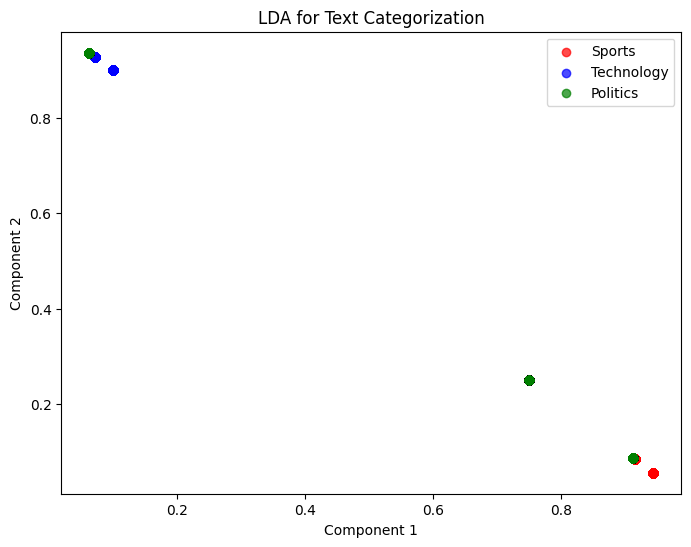

In [64]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

# Load the data set
df = pd.read_csv("./Sportdata.csv")

# Step 2: Convert Text to Numerical Features
vectorizer = CountVectorizer(max_features=1000)  # You can adjust the max_features based on your data
X = vectorizer.fit_transform(df['Text'])

# Step 3: Apply LDA for Dimensionality Reduction
n_components = 2  # Set the number of desired components
lda = LatentDirichletAllocation(n_components=n_components, random_state=42)
X_reduced = lda.fit_transform(X)

# Step 4: Visualize the Lower-Dimensional Space
# Create a DataFrame for the reduced data
df_reduced = pd.DataFrame(X_reduced, columns=[f"Component {i}" for i in range(1, n_components + 1)])

# Append the category labels to the reduced DataFrame
df_reduced['Category'] = df['Category']

# Scatter plot to visualize the reduced data
colors = {'Sports': 'red', 'Technology': 'blue', 'Politics': 'green'}
plt.figure(figsize=(8, 6))
for category, color in colors.items():
    plt.scatter(df_reduced[df_reduced['Category'] == category]['Component 1'],
                df_reduced[df_reduced['Category'] == category]['Component 2'],
                color=color, alpha=0.7, label=category)
print(df_reduced)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('LDA for Text Categorization')
plt.legend()
plt.show()


# 4. t-Distributed Stochastic Neighbor Embedding (t-SNE)

In [19]:
data = pd.read_csv('word_embeddings_dataset.csv')
data

,Sentence
0,apple apple grape orange kiwi peach pear apple
1,pear mango pineapple pineapple kiwi melon pine...
2,pineapple kiwi mango pear pear pineapple kiwi
3,apple peach mango grape peach kiwi melon mango...
4,mango grape peach peach mango pineapple pineap...
...,...
995,melon pear melon melon melon orange
996,kiwi pear banana kiwi mango grape peach apple ...
997,mango pear melon pear mango banana apple pear ...
998,orange kiwi grape pineapple melon banana kiwi ...


actual data:                                                Sentence  \
0       apple apple grape orange kiwi peach pear apple   
1    pear mango pineapple pineapple kiwi melon pine...   
2        pineapple kiwi mango pear pear pineapple kiwi   
3    apple peach mango grape peach kiwi melon mango...   
4    mango grape peach peach mango pineapple pineap...   
..                                                 ...   
995                melon pear melon melon melon orange   
996  kiwi pear banana kiwi mango grape peach apple ...   
997  mango pear melon pear mango banana apple pear ...   
998  orange kiwi grape pineapple melon banana kiwi ...   
999  peach banana pineapple peach peach melon pinea...   

                                            Embeddings  
0    [0.5485389732072868, 0.6046635770224406, 0.554...  
1    [0.3874230100116601, 0.5738556079248099, 0.506...  
2    [0.3932995108149421, 0.5556462920193977, 0.591...  
3    [0.5131440001469655, 0.6287417420471736, 0.418...  
4   

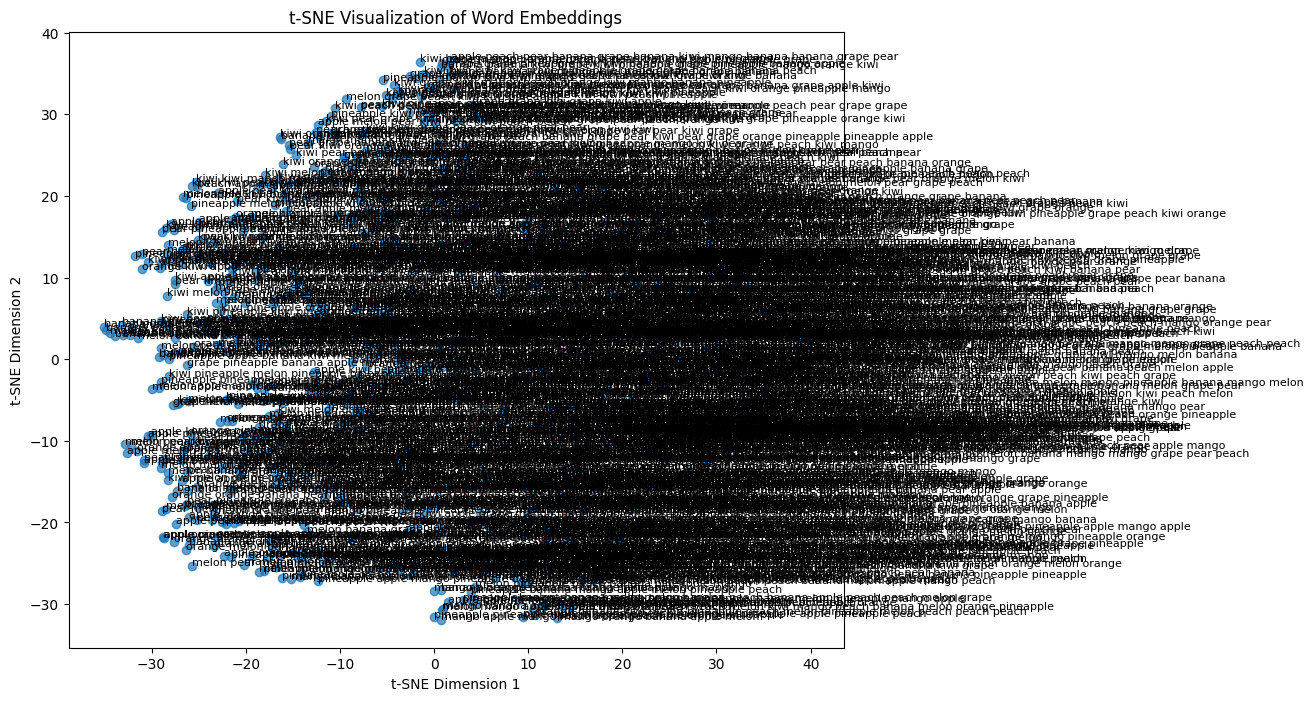

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Step 1: Load the data from the CSV file
data = pd.read_csv('word_embeddings_dataset.csv')

# Step 2: Extract the word embeddings data from the DataFrame
# For simplicity, we will use random word embeddings
word_embeddings = {
    'apple': np.random.rand(5),
    'banana': np.random.rand(5),
    'orange': np.random.rand(5),
    'grape': np.random.rand(5),
    'kiwi': np.random.rand(5),
    'melon': np.random.rand(5),
    'pear': np.random.rand(5),
    'pineapple': np.random.rand(5),
    'peach': np.random.rand(5),
    'mango': np.random.rand(5),
}

# Function to convert words to word embeddings
def convert_to_embeddings(sentence):
    words = sentence.split()
    embeddings = [word_embeddings[word] for word in words if word in word_embeddings]
    return np.mean(embeddings, axis=0) if embeddings else None

# Apply the function to each sentence in the DataFrame
data['Embeddings'] = data['Sentence'].apply(convert_to_embeddings)

# Remove rows with missing word embeddings
data = data.dropna()

# Step 3: Apply t-SNE to reduce the dimensions
X = np.stack(data['Embeddings'].values)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Step 4: Visualize the reduced dimensions using a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.7)


# print the data
print("actual data: ", data)
# print the components
reduced_embeddings = X_tsne
print(reduced_embeddings)

# Add labels to the points for better visualization
for i, sentence in enumerate(data['Sentence']):
    plt.annotate(sentence, (X_tsne[i, 0], X_tsne[i, 1]), fontsize=8)

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Word Embeddings')
plt.show()


In [22]:
data

,Sentence,Embeddings
0,apple apple grape orange kiwi peach pear apple,"[0.6156277956561473, 0.43826682575352177, 0.32..."
1,pear mango pineapple pineapple kiwi melon pine...,"[0.4595652406972897, 0.44254935533552975, 0.35..."
2,pineapple kiwi mango pear pear pineapple kiwi,"[0.3741546257867928, 0.43285719023403907, 0.34..."
3,apple peach mango grape peach kiwi melon mango...,"[0.5068998165929832, 0.39248624689614814, 0.38..."
4,mango grape peach peach mango pineapple pineap...,"[0.6665791459440468, 0.35778197550070456, 0.47..."
...,...,...
995,melon pear melon melon melon orange,"[0.18402673307948914, 0.38275540992898355, 0.3..."
996,kiwi pear banana kiwi mango grape peach apple ...,"[0.40744224485002045, 0.46442889230335566, 0.3..."
997,mango pear melon pear mango banana apple pear ...,"[0.49141201052323047, 0.4825021237188823, 0.32..."
998,orange kiwi grape pineapple melon banana kiwi ...,"[0.4113485197614095, 0.509066336969372, 0.3728..."


In [25]:
X.shape

(1000, 5)